# От чего зависит цена на жилье в Калифорнии?

Цель анализа: выявить главный фактор, который влияет на стоимость жилья, а также выяснить, какое влияние оказывает близость к океану.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [3]:
df_housing = pd.read_csv('housing.csv', sep = ',')

In [4]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
#мы видим, что в столбце total_bedrooms есть пропущенные значения. Чтобы далее работать с датасетом, заменим их
df_housing_without_NaN = df_housing.dropna() #дропнуть строки с нан

In [7]:
df_housing_without_NaN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20433 non-null float64
latitude              20433 non-null float64
housing_median_age    20433 non-null float64
total_rooms           20433 non-null float64
total_bedrooms        20433 non-null float64
population            20433 non-null float64
households            20433 non-null float64
median_income         20433 non-null float64
median_house_value    20433 non-null float64
ocean_proximity       20433 non-null object
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
#поработаем с переменнной ocean proximity, тк это object. изучим, какие значения она принимает
df_housing_without_NaN['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
#несмотря на то, что переменная задана тэгами и может быть категориальной, сейчас она строковая. изменим ее тип, 
#чтобы в дальнейшем было удобнее работать с датасетом
df_housing_without_NaN['ocean_proximity'] = pd.Categorical(df_housing_without_NaN['ocean_proximity'])

/Users/poliasharovatova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
df_housing_without_NaN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20433 non-null float64
latitude              20433 non-null float64
housing_median_age    20433 non-null float64
total_rooms           20433 non-null float64
total_bedrooms        20433 non-null float64
population            20433 non-null float64
households            20433 non-null float64
median_income         20433 non-null float64
median_house_value    20433 non-null float64
ocean_proximity       20433 non-null category
dtypes: category(1), float64(9)
memory usage: 1.6 MB


# Выявим, какие факторы влияют на цену жилья

In [11]:
corr_m = df_housing_without_NaN.corr()
corr_m

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


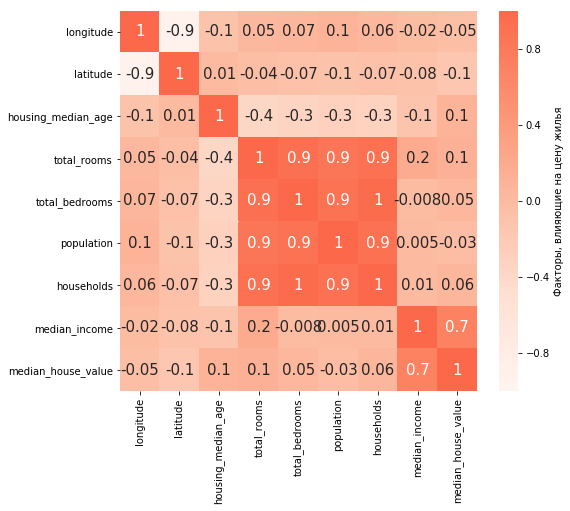

In [12]:
#проверка предпосылок — мультиколлинеарность независимых переменных
plt.figure(figsize = (8,7))
matrix = np.triu(corr_m)
sns.heatmap(corr_m, annot = True,
            center = 1, 
            linecolor = 'yellow', 
            annot_kws = {'size':15}, 
            cmap = 'Reds', 
            vmax = 1, 
            vmin = -1,
            fmt = '.1g',
            cbar_kws = {'label':'Факторы, влияющие на цену жилья'}) 

#действительно, корреляция между независимыми переменными слабая

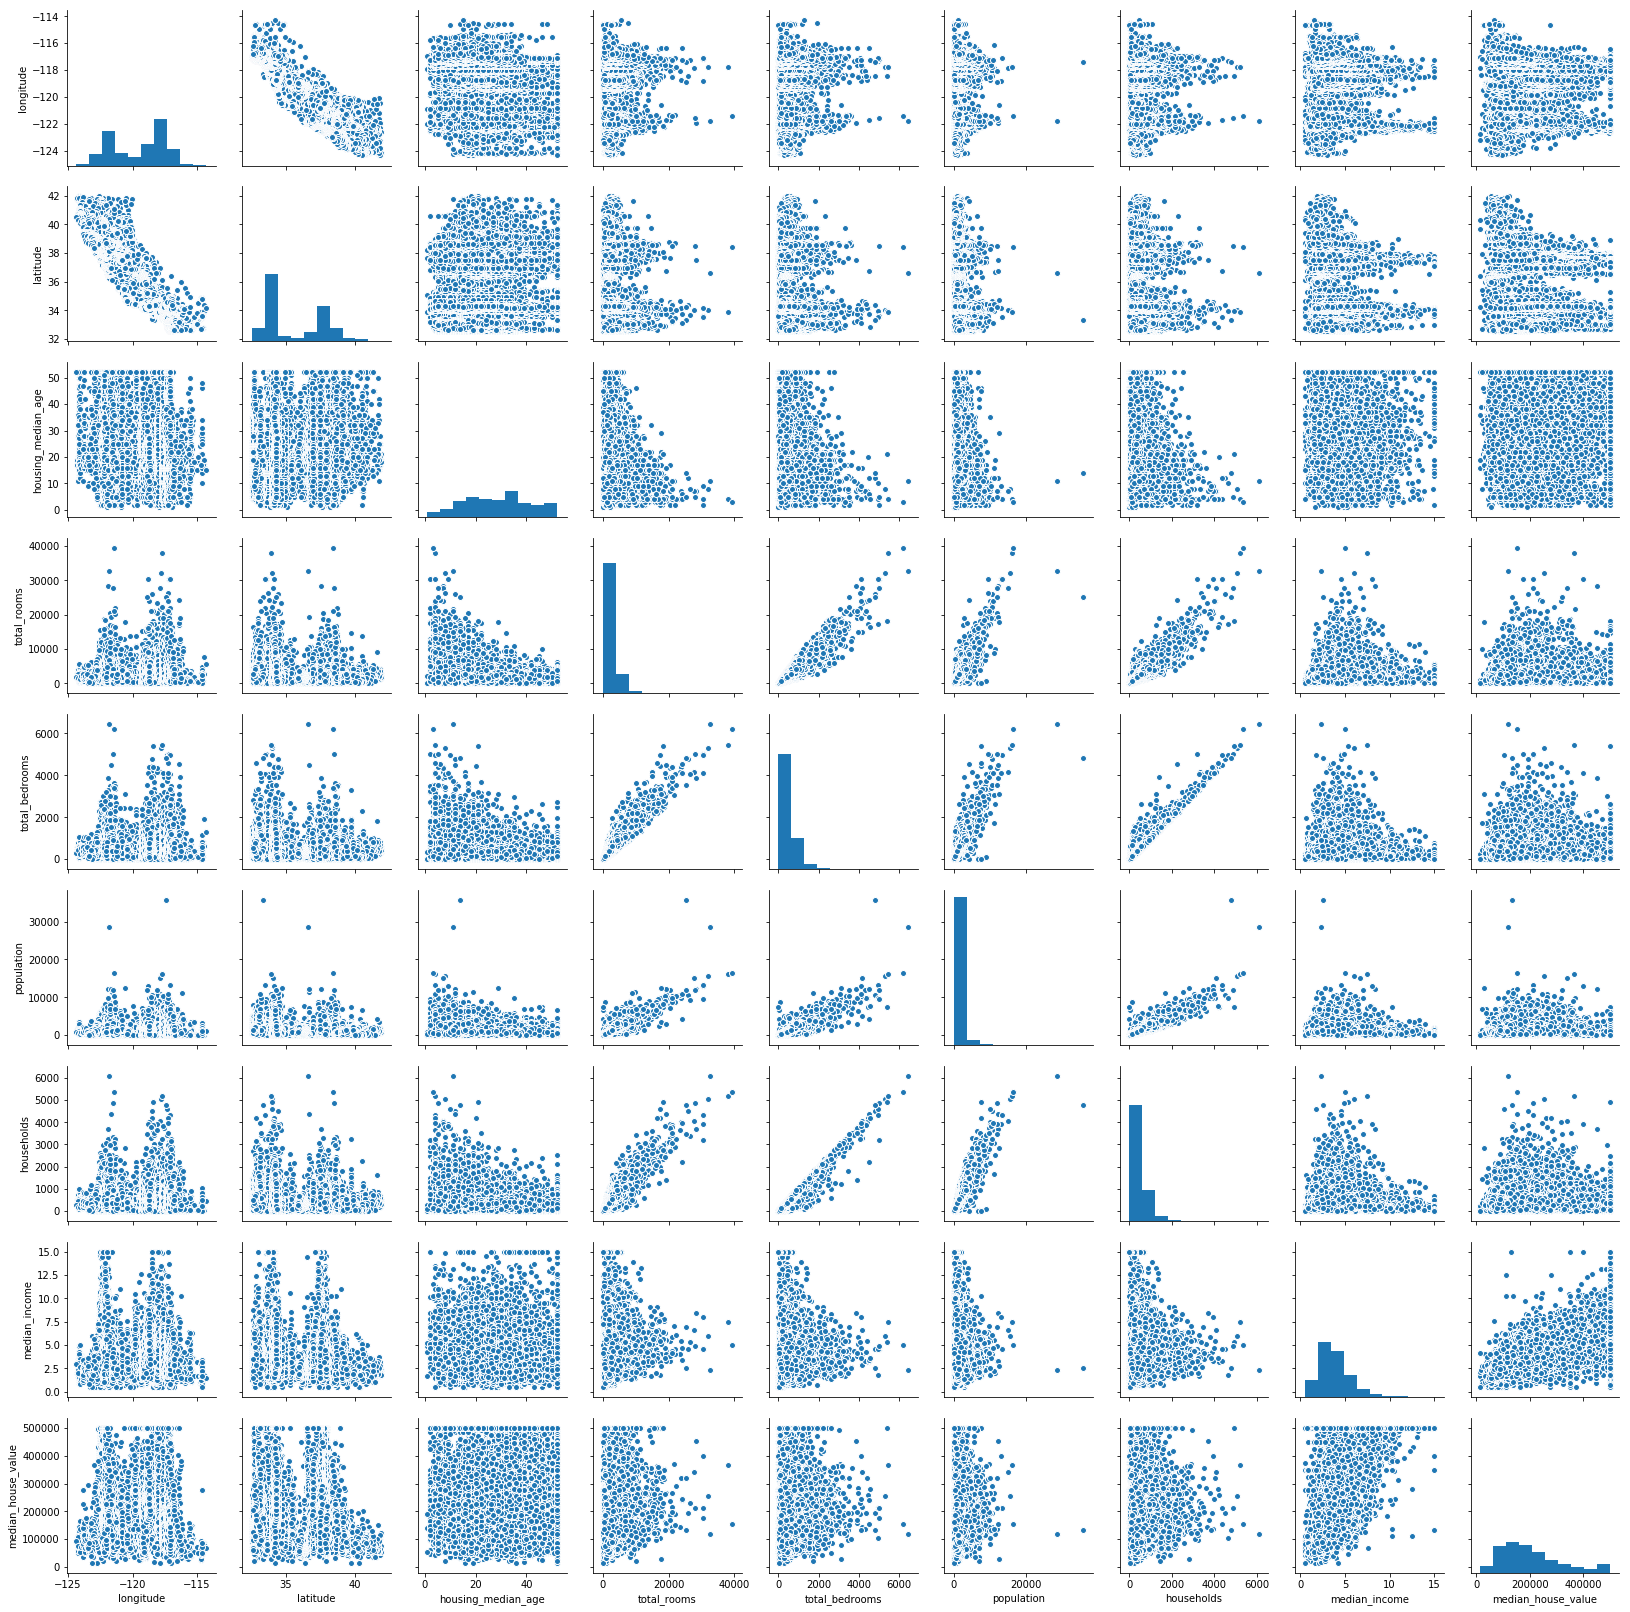

In [13]:
sns.pairplot(df_housing_without_NaN)

In [14]:
#видим, что самая сильная корреляция и линейная связь — между признаками longitude и lattitude, 
#total bedrooms и total rooms, population и total rooms, households и total rooms,
#househols и total rooms, population и households

#однако интересно проанализировать связь median income и median house value. В этом случае корреляция меньше, но по этой паре
#данных можно сделать релевантные выводы: о зависимости уровня дохода от стоимости жилья. 

In [15]:
X = df_housing_without_NaN['median_income']
y = df_housing_without_NaN['median_house_value']

res = scipy.stats.linregress(X, y)
print(res)

LinregressResult(slope=41837.06607562297, intercept=44906.369450883154, rvalue=0.6883554753161125, pvalue=0.0, stderr=308.43619277749195)


In [16]:
r_sq = res.rvalue ** 2
print(r_sq)

0.4738332603976712


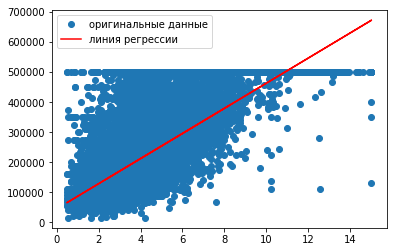

In [17]:
plt.plot(X, y, 'o', label='оригинальные данные')
plt.plot(X, res.intercept + res.slope*X, 'r', label='линия регрессии')
plt.legend()
plt.show()

In [18]:
#и по графику, и по результату r квадрат видим, что построенная модель не полностью описывает связь между данными, однако тем не 
#менее выдает хороший результат 0,47 r квадрат. 
#для сравнения построим линейную регрессию также между признаками с большей корреляцией, например, households и population

In [19]:
X1 = df_housing_without_NaN['population']
y1 = df_housing_without_NaN['households']

res1 = scipy.stats.linregress(X1, y1)
print(res1)

LinregressResult(slope=0.3060482431142068, intercept=63.33095533368072, rvalue=0.9071859001744996, pvalue=0.0, stderr=0.000993006929996141)


In [21]:
r_sq1 = res1.rvalue ** 2
print(r_sq1)

0.8229862574754172


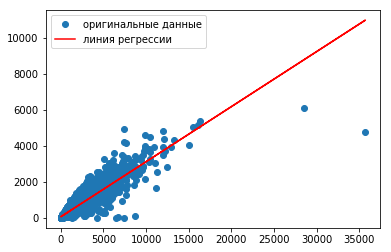

In [23]:
plt.plot(X1, y1, 'o', label='оригинальные данные')
plt.plot(X1, res1.intercept + res1.slope*X1, 'r', label='линия регрессии')
plt.legend()
plt.show()

In [ ]:
#действительно, данная модель качественно описывает связь между данными

Итак, больше всего на цену жилья влияет доход хозяйства. 

# Влияет ли близость к заливу на стоимость дома?

In [ ]:
Построим гипотезу о том, что близость к заливу влияет на цену дома. 
Близость к заливу — уже категориальная переменная, теперь распределим цену дома по категориям

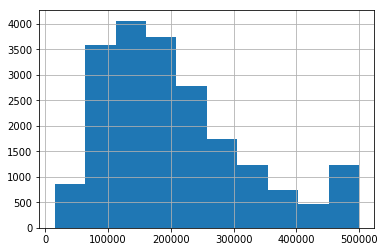

In [27]:
df_housing_without_NaN['median_house_value'].hist()

In [63]:
#исходя из гистограммы, поделим дома по стоимости на 3 группы: 
def get_value_cat(median_house_value):
    if median_house_value <= 200000:
        return 'Cheap'
    elif median_house_value <= 400000:
        return 'Middle'
    elif median_house_value <= 600000:
        return 'Expensive'
    else: 
        return median_house_value

In [64]:
df_housing_without_NaN['median_house_value_cat'] = df_housing_without_NaN['median_house_value'].apply(get_value_cat) 

/Users/poliasharovatova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
df_housing_without_NaN['median_house_value_cat'] = pd.Categorical(df_housing_without_NaN['median_house_value_cat'])

/Users/poliasharovatova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
df_housing_without_NaN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 11 columns):
longitude                 20433 non-null float64
latitude                  20433 non-null float64
housing_median_age        20433 non-null float64
total_rooms               20433 non-null float64
total_bedrooms            20433 non-null float64
population                20433 non-null float64
households                20433 non-null float64
median_income             20433 non-null float64
median_house_value        20433 non-null float64
ocean_proximity           20433 non-null category
median_house_value_cat    20433 non-null category
dtypes: category(2), float64(9)
memory usage: 2.2 MB


In [67]:
#так как обе переменные категориальные, мы можем проверить нашу гипотезу через критерий хи-квадрат
#H0: близость к заливу не влияет на стоимость дома
#H1: близость к заливу влияет на стоимость дома

In [68]:
#построим таблицу сопряженности
ct_o = df_housing_without_NaN.groupby('ocean_proximity')['median_house_value_cat'].value_counts().unstack()
ct_o

median_house_value_cat,Cheap,Expensive,Middle
ocean_proximity,,,
<1H OCEAN,4026.0,919.0,4089.0
INLAND,5787.0,68.0,641.0
ISLAND,NaN,3.0,2.0
NEAR BAY,898.0,361.0,1011.0
NEAR OCEAN,1101.0,375.0,1152.0


In [69]:
dof = (ct_o.shape[0] - 1) * (ct_o.shape[1] - 1)
dof
#расчет степеней свободы

8

In [74]:
alpha = 0.01 #1% возможности ошибки первого рода
critical_value = 20.090 #если критерий выше этого значения, нулевая гипотеза о независимости отвергнута

In [75]:
n_total = ct_o.sum().sum()
print(n_total) #получаем кол-во наблюдений

20433.0


In [85]:
n_target_Cheap = ct_o['Cheap'].sum()
n_target_Expensive = ct_o['Expensive'].sum()
n_target_Middle = ct_o['Middle'].sum()

print(n_target_Cheap, n_target_Expensive, n_target_Middle)

11812.0 1726.0 6895.0


In [86]:
p_target_Cheap = n_target_Cheap / n_total
p_target_Expensive = n_target_Expensive / n_total
p_target_Middle = n_target_Middle / n_total

print(p_target_Cheap, p_target_Expensive, p_target_Middle)

0.5780844711985513 0.084471198551363 0.33744433025008563


In [87]:
n_less1h = ct_o.iloc[0].sum() #общее кол-во домов покатегориям близости к заливу
n_inland = ct_o.iloc[1].sum()
n_island = ct_o.iloc[2].sum()
n_nearbay = ct_o.iloc[3].sum()
n_nearocean = ct_o.iloc[4].sum()

print(n_less1h, n_inland, n_island, n_nearbay, n_nearocean)

9034.0 6496.0 5.0 2270.0 2628.0


In [88]:
f_e_target_Cheap_less1h = n_less1h * p_target_Cheap #теоретич. частоты для <1H OCEAN
f_e_target_Expensive_less1h = n_less1h * p_target_Expensive 
f_e_target_Middle_less1h = n_less1h * p_target_Middle 

print(f_e_target_Cheap_less1h, f_e_target_Expensive_less1h, f_e_target_Middle_less1h)

5222.415112807713 763.1128077130132 3048.472079479274


In [89]:
f_e_target_Cheap_inland = n_inland * p_target_Cheap #теоретич. частоты для INLAND
f_e_target_Expensive_inland = n_inland * p_target_Expensive 
f_e_target_Middle_inland = n_inland * p_target_Middle 

print(f_e_target_Cheap_inland, f_e_target_Expensive_inland, f_e_target_Middle_inland)

3755.2367249057893 548.724905789654 2192.0383693045565


In [90]:
f_e_target_Cheap_island = n_island * p_target_Cheap #теоретич. частоты для ISLAND
f_e_target_Expensive_island = n_island * p_target_Expensive 
f_e_target_Middle_island = n_island * p_target_Middle 

print(f_e_target_Cheap_island, f_e_target_Expensive_island, f_e_target_Middle_island)

2.8904223559927567 0.42235599275681496 1.6872216512504281


In [91]:
f_e_target_Cheap_nearbay = n_nearbay * p_target_Cheap #теоретич. частоты для NEAR BAY
f_e_target_Expensive_nearbay = n_nearbay * p_target_Expensive 
f_e_target_Middle_nearbay = n_nearbay * p_target_Middle 

print(f_e_target_Cheap_nearbay, f_e_target_Expensive_nearbay, f_e_target_Middle_nearbay)

1312.2517496207115 191.749620711594 765.9986296676943


In [92]:
f_e_target_Cheap_nearocean = n_nearocean * p_target_Cheap #теоретич. частоты для NEAR OCEAN
f_e_target_Expensive_nearocean = n_nearocean * p_target_Expensive 
f_e_target_Middle_nearocean = n_nearocean * p_target_Middle 

print(f_e_target_Cheap_nearocean, f_e_target_Expensive_nearocean, f_e_target_Middle_nearocean)

1519.205990309793 221.99030979298195 886.8036998972251


In [93]:
#получаем теоретические частоты
ct_e = np.array([[f_e_target_Cheap_less1h, f_e_target_Expensive_less1h, f_e_target_Middle_less1h], [f_e_target_Cheap_inland, f_e_target_Expensive_inland, f_e_target_Middle_inland], [f_e_target_Cheap_island, f_e_target_Expensive_island, f_e_target_Middle_island], [f_e_target_Cheap_nearbay, f_e_target_Expensive_nearbay, f_e_target_Middle_nearbay], [f_e_target_Cheap_nearocean, f_e_target_Expensive_nearocean, f_e_target_Middle_nearocean]])
print(ct_e)

[[5.22241511e+03 7.63112808e+02 3.04847208e+03]
 [3.75523672e+03 5.48724906e+02 2.19203837e+03]
 [2.89042236e+00 4.22355993e-01 1.68722165e+00]
 [1.31225175e+03 1.91749621e+02 7.65998630e+02]
 [1.51920599e+03 2.21990310e+02 8.86803700e+02]]


In [94]:
#рассчитываем критерий хи квадрат Пирсона
chi_square = ((ct_o - ct_e)**2/ct_e).sum().sum()
print(chi_square)

3953.2165429298175


In [95]:
print(chi_square, critical_value)
chi_square > critical_value

3953.2165429298175 20.09


True

Критерий хи-квадрат получился больше критического значения, значит, мы можем отвергнуть нулевую гипотезу. 
То есть связь между близостью к заливу и стоимостью дома может существовать. 